In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calmap
import pandas_profiling

In [2]:
sales = pd.read_csv('/content/sample_data/supermarket_sales.csv')

In [3]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
sales.describe()

Unit price     Quantity  ...  gross income       Rating
count  1001.000000  1001.000000  ...   1001.000000  1001.000000
mean     55.691129     5.511489  ...     15.390120     6.974825
std      26.488199     2.922348  ...     11.707912     1.719036
min      10.080000     1.000000  ...      0.508500     4.000000
25%      32.900000     3.000000  ...      5.955000     5.500000
50%      55.390000     5.000000  ...     12.096000     7.000000
75%      77.930000     8.000000  ...     22.491000     8.500000
max      99.960000    10.000000  ...     49.650000    10.000000

[8 rows x 8 columns]

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1001 non-null   object 
 1   Branch                   1001 non-null   object 
 2   City                     1001 non-null   object 
 3   Customer type            999 non-null    object 
 4   Gender                   1001 non-null   object 
 5   Product line             999 non-null    object 
 6   Unit price               1001 non-null   float64
 7   Quantity                 1001 non-null   int64  
 8   Tax 5%                   1001 non-null   float64
 9   Total                    1001 non-null   float64
 10  Date                     1001 non-null   object 
 11  Time                     1001 non-null   object 
 12  Payment                  1001 non-null   object 
 13  cogs                     1001 non-null   float64
 14  gross margin percentage 

In [6]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1001 non-null   object        
 1   Branch                   1001 non-null   object        
 2   City                     1001 non-null   object        
 3   Customer type            999 non-null    object        
 4   Gender                   1001 non-null   object        
 5   Product line             999 non-null    object        
 6   Unit price               1001 non-null   float64       
 7   Quantity                 1001 non-null   int64         
 8   Tax 5%                   1001 non-null   float64       
 9   Total                    1001 non-null   float64       
 10  Date                     1001 non-null   datetime64[ns]
 11  Time                     1001 non-null   object        
 12  Payment                  1001 non-

In [8]:
sales['Date']

0      2019-01-05
1      2019-01-05
2      2019-03-08
3      2019-03-03
4      2019-01-27
          ...    
996    2019-01-29
997    2019-03-02
998    2019-02-09
999    2019-02-22
1000   2019-02-18
Name: Date, Length: 1001, dtype: datetime64[ns]

In [9]:
sales.set_index('Date',inplace=True)

In [10]:
sales.head()

Invoice ID Branch  ... gross income Rating
Date                            ...                    
2019-01-05  750-67-8428      A  ...      26.1415    9.1
2019-01-05  750-67-8428      A  ...      26.1415    9.1
2019-03-08  226-31-3081      C  ...       3.8200    9.6
2019-03-03  631-41-3108      A  ...      16.2155    7.4
2019-01-27  123-19-1176      A  ...      23.2880    8.4

[5 rows x 16 columns]

In [11]:
sales.describe()

Unit price     Quantity  ...  gross income       Rating
count  1001.000000  1001.000000  ...   1001.000000  1001.000000
mean     55.691129     5.511489  ...     15.390120     6.974825
std      26.488199     2.922348  ...     11.707912     1.719036
min      10.080000     1.000000  ...      0.508500     4.000000
25%      32.900000     3.000000  ...      5.955000     5.500000
50%      55.390000     5.000000  ...     12.096000     7.000000
75%      77.930000     8.000000  ...     22.491000     8.500000
max      99.960000    10.000000  ...     49.650000    10.000000

[8 rows x 8 columns]

#Univariate Analysis

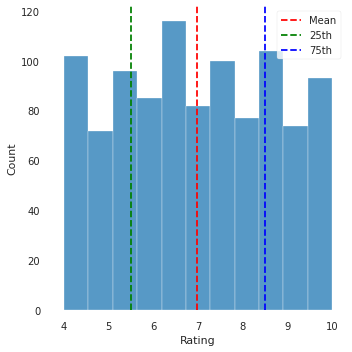

In [12]:
sns.displot(sales['Rating'])
plt.axvline(x=np.mean(sales['Rating']),c='red',ls='--', label='Mean')
plt.axvline(x=np.percentile(sales['Rating'],25), c='green', ls='--', label='25th')
plt.axvline(x=np.percentile(sales['Rating'],75), c='blue', ls='--', label='75th')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25a37475d0>,
      dtype=object)

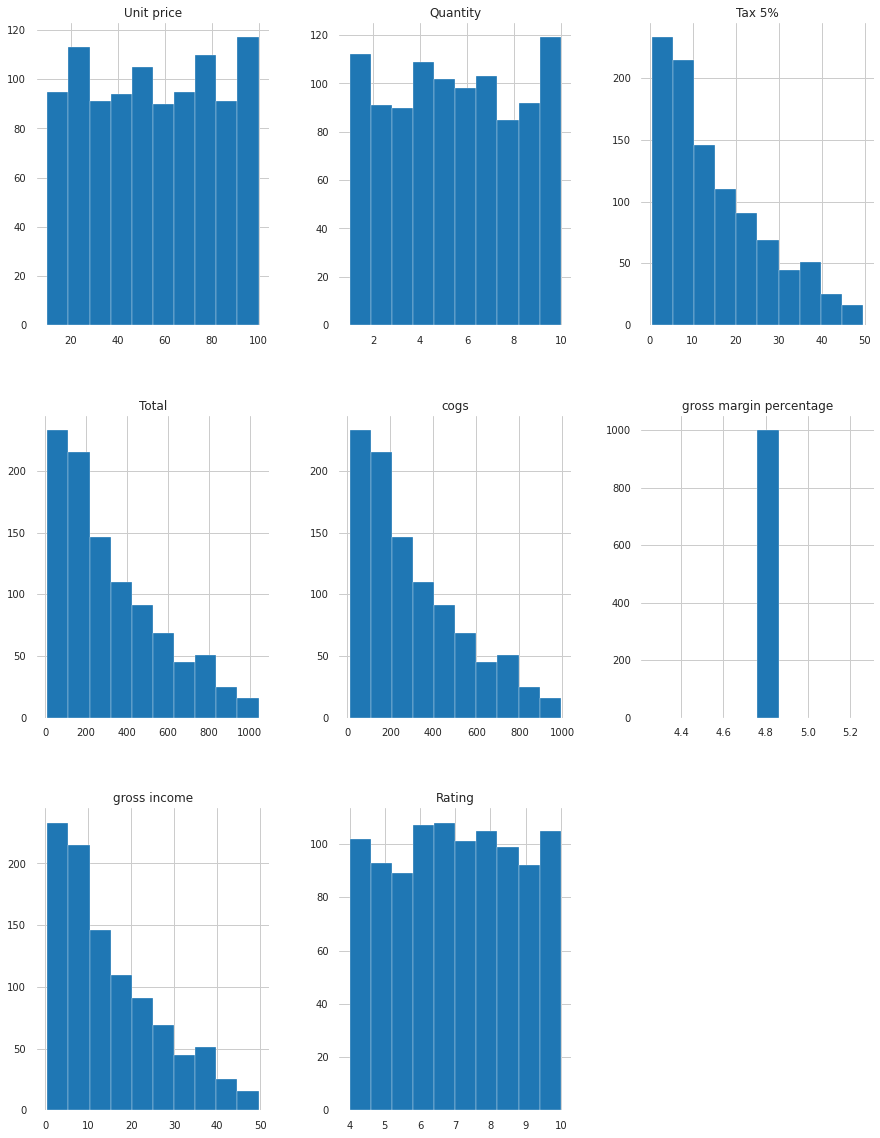

In [13]:
sales.hist(figsize=(15,20))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


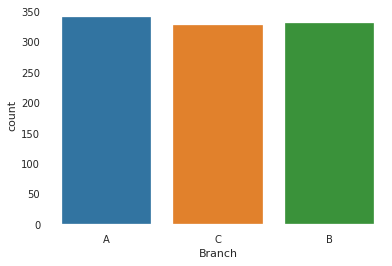

In [14]:
sns.countplot(sales['Branch'])

In [15]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [16]:
sales['Branch'].value_counts()

A    341
B    332
C    328
Name: Branch, dtype: int64

In [17]:
sales['Payment'].value_counts()

Ewallet        346
Cash           344
Credit card    311
Name: Payment, dtype: int64

#Bi-Variate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


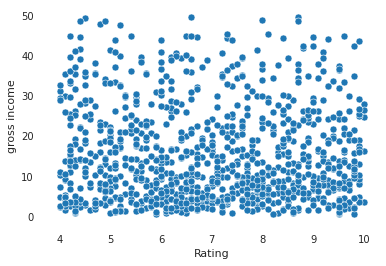

In [18]:
sns.scatterplot(sales['Rating'], sales['gross income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


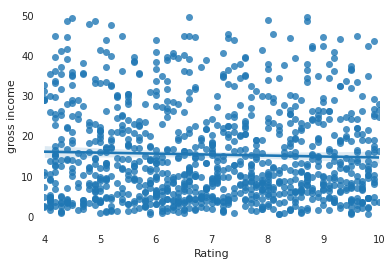

In [19]:
sns.regplot(sales['Rating'], sales['gross income'])

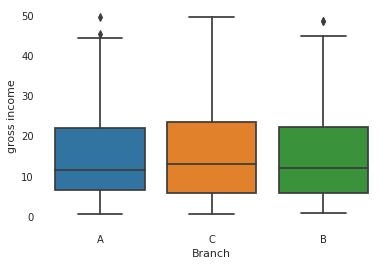

In [20]:
sns.boxplot(x = sales['Branch'], y = sales['gross income'])

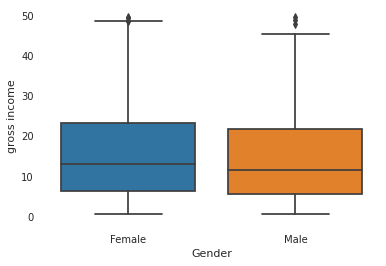

In [21]:
sns.boxplot(x = sales['Gender'], y = sales['gross income'])

In [22]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [23]:
sales.groupby(sales.index).mean()

Unit price  Quantity  ...  gross income    Rating
Date                              ...                        
2019-01-01   54.995833  6.750000  ...     18.830083  6.583333
2019-01-02   44.635000  6.000000  ...     11.580375  6.050000
2019-01-03   59.457500  4.625000  ...     12.369813  8.112500
2019-01-04   51.743333  5.333333  ...     12.886417  6.516667
2019-01-05   62.640769  4.769231  ...     14.965769  7.561538
...                ...       ...  ...           ...       ...
2019-03-26   42.972308  4.000000  ...      7.188692  6.623077
2019-03-27   56.841000  4.500000  ...     13.822950  6.760000
2019-03-28   45.525000  4.800000  ...     10.616200  7.050000
2019-03-29   66.346250  6.750000  ...     23.947875  6.925000
2019-03-30   67.408182  6.090909  ...     19.424500  6.800000

[89 rows x 8 columns]

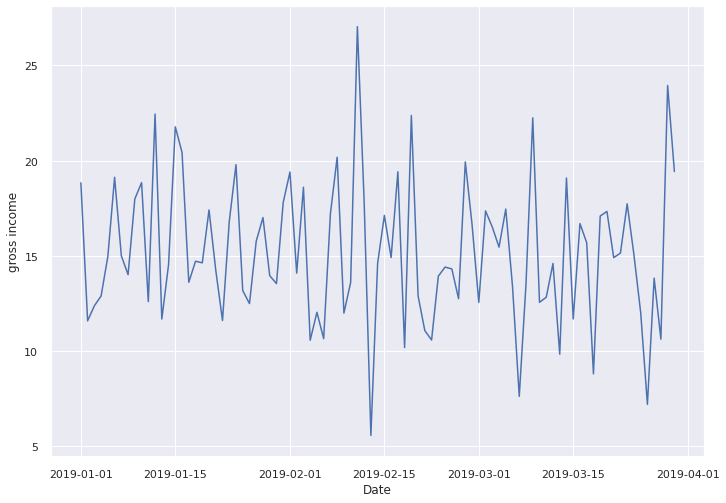

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=sales.groupby(sales.index).mean().index, y=sales.groupby(sales.index).mean()['gross income'])

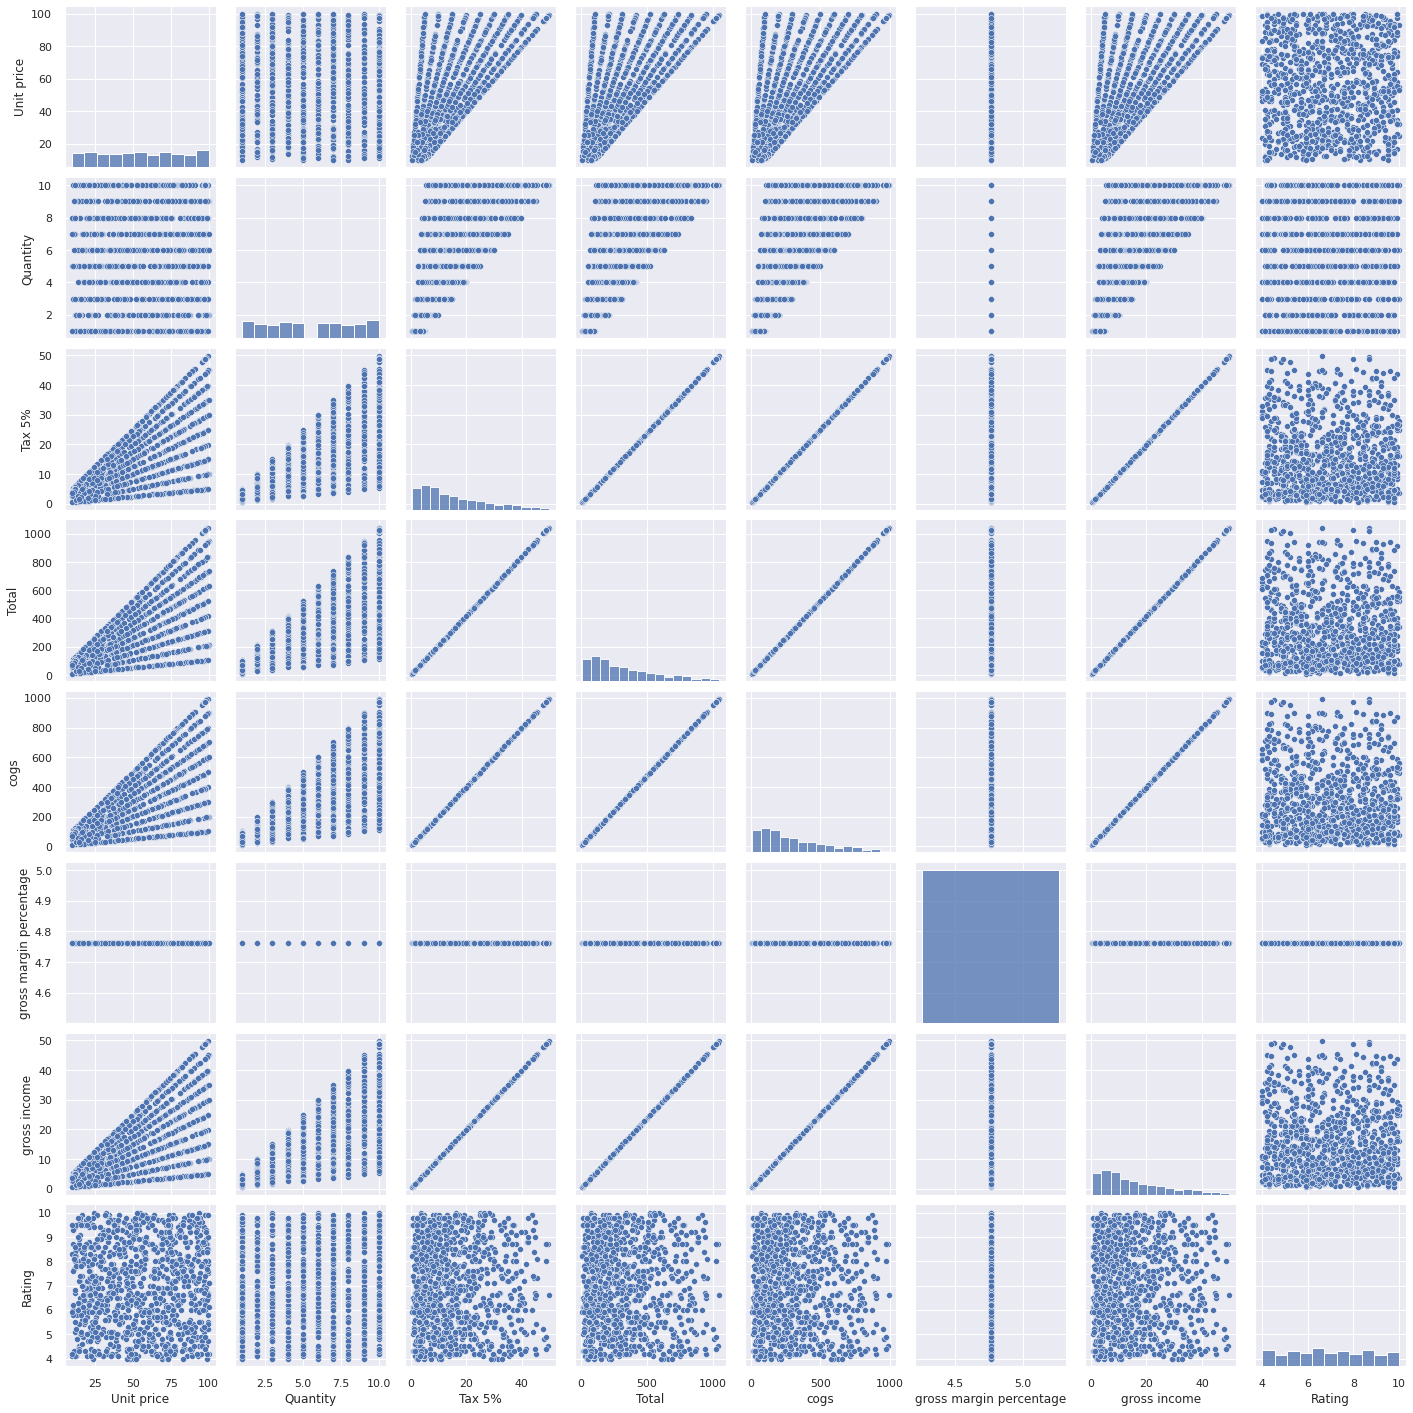

In [25]:
sns.pairplot(sales)

#Duplicate rows with Missing values

In [26]:
sales.duplicated().sum()

1

In [27]:
sales[sales.duplicated()==True]

Invoice ID Branch  ... gross income Rating
Date                            ...                    
2019-01-05  750-67-8428      A  ...      26.1415    9.1

[1 rows x 16 columns]

In [28]:
sales.drop_duplicates(inplace=True)

In [29]:
sales.isna().sum()/len(sales)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.002
Gender                     0.000
Product line               0.002
Unit price                 0.000
Quantity                   0.000
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

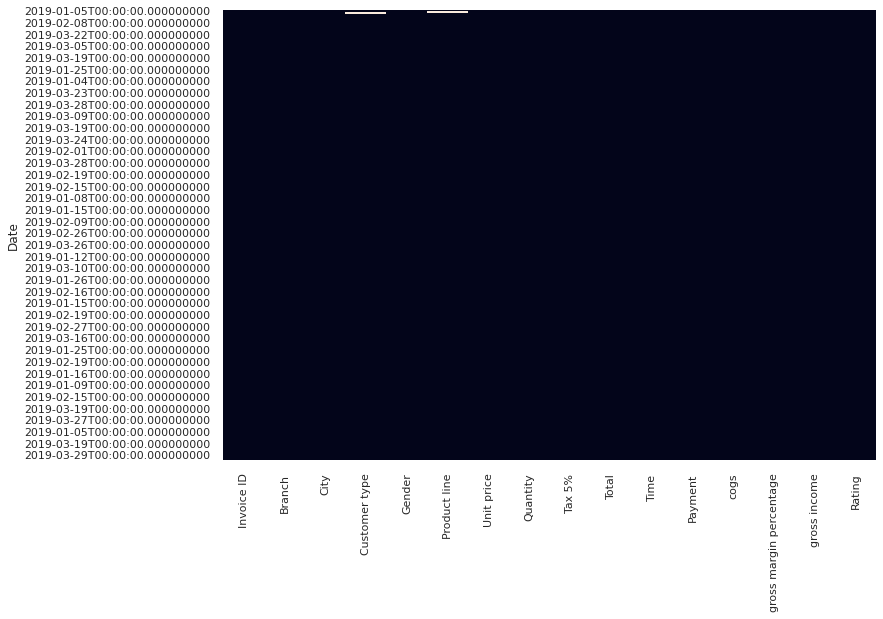

In [30]:
sns.heatmap(sales.isnull(), cbar=False)

In [31]:
sales.fillna(sales.mean(), inplace=True)

In [32]:
sales.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              2
Gender                     0
Product line               2
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [34]:
sales.mode()

Invoice ID Branch    City  ... gross margin percentage gross income Rating
0    101-17-6199      A  Yangon  ...                4.761905       4.1540    6.0
1    101-81-4070    NaN     NaN  ...                     NaN       4.4640    NaN
2    102-06-2002    NaN     NaN  ...                     NaN       8.3770    NaN
3    102-77-2261    NaN     NaN  ...                     NaN       9.0045    NaN
4    105-10-6182    NaN     NaN  ...                     NaN      10.3260    NaN
..           ...    ...     ...  ...                     ...          ...    ...
995  894-41-5205    NaN     NaN  ...                     NaN          NaN    NaN
996  895-03-6665    NaN     NaN  ...                     NaN          NaN    NaN
997  895-66-0685    NaN     NaN  ...                     NaN          NaN    NaN
998  896-34-0956    NaN     NaN  ...                     NaN          NaN    NaN
999  898-04-2717    NaN     NaN  ...                     NaN          NaN    NaN

[1000 rows x 16 columns]

In [35]:
sales.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                               83.77
Quantity                                    10
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage                 4.7619
gross income                             4.154
Rating                                       6
Name: 0, dtype: object

In [36]:
sales.fillna(sales.mode().iloc[0], inplace=True)

In [37]:
sales.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [42]:
dataset =  pd.read_csv('/content/sample_data/supermarket_sales.csv')
#prof = sales.profile_report()
#prof

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Correlation Analysis

In [45]:
np.corrcoef(sales['gross income'], sales.Rating)

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [46]:
sales.corr()

Unit price      Quantity  ...  gross income        Rating
Unit price               1.000000e+00  1.077756e-02  ...  6.339621e-01 -8.777507e-03
Quantity                 1.077756e-02  1.000000e+00  ...  7.055102e-01 -1.581490e-02
Tax 5%                   6.339621e-01  7.055102e-01  ...  1.000000e+00 -3.644170e-02
Total                    6.339621e-01  7.055102e-01  ...  1.000000e+00 -3.644170e-02
cogs                     6.339621e-01  7.055102e-01  ...  1.000000e+00 -3.644170e-02
gross margin percentage -6.998957e-16 -3.849075e-16  ...  2.461896e-16  2.042714e-15
gross income             6.339621e-01  7.055102e-01  ...  1.000000e+00 -3.644170e-02
Rating                  -8.777507e-03 -1.581490e-02  ... -3.644170e-02  1.000000e+00

[8 rows x 8 columns]

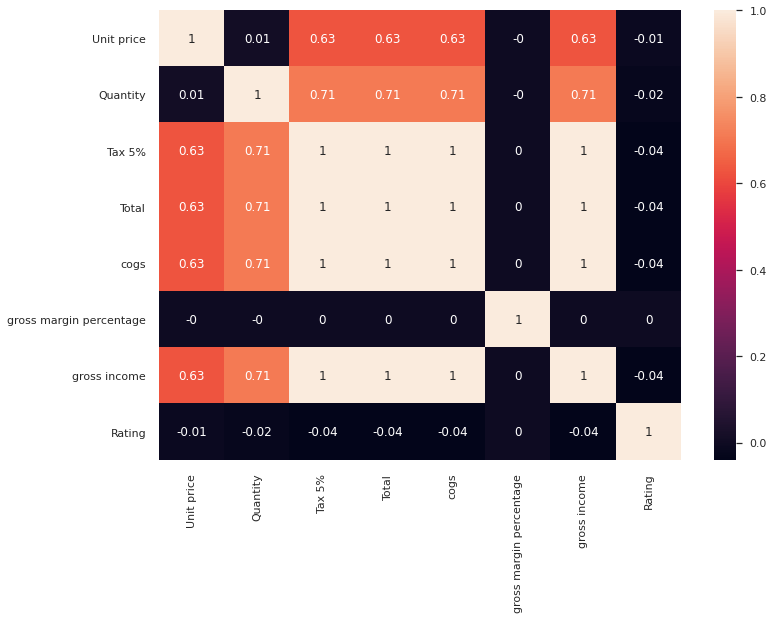

In [50]:
sns.heatmap(np.round(sales.corr(),2), annot=True)